# Problem Set 4


> Group members: 
>
> Wanxin Luo (33432808) Section 003
> 
> Tony Liang (39356993) Section 004

We first tried problem by ourselves, and compared our solutions after finishing the assignment to check anywhere that we might have mismatched for certain questions (i.e. not getting same output), and solutions were combined to one `.ipynb`file.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt

## Question 1

As in [Applied Linear Algebra](https://datascience.quantecon.org/../scientific/applied_linalg.html):

Consider an economy where in any given year, $ \alpha = 4\% $ of current employed workers lose their jobs and
$ \phi = 15\% $ of unemployed workers find jobs.

Define the vector $ x_0 = \begin{bmatrix} 650,000 & 150,000 \end{bmatrix} $ as the number of
employed and unemployed workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the unemployment rate over time in this economy for $ t = 0, \ldots 20 $ (i.e. number of employed over the total number of workers).

<Axes: xlabel='Time period (t)', ylabel='Unemployment Rate'>

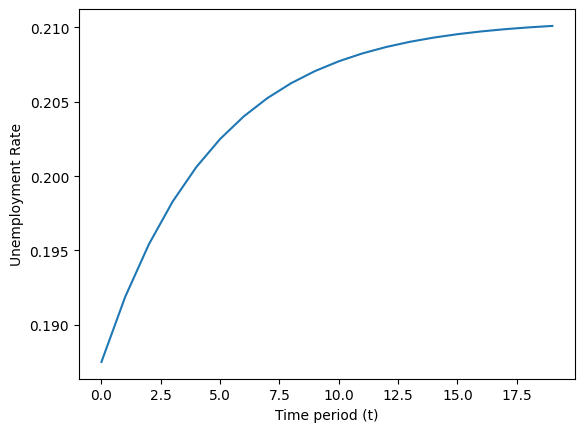

In [24]:
# your code here

# Adapted from Applied Linear Algebra lec
# number of employed and unemployed at time 0
x0 = np.array([650_000, 150_000])

# rates alpha = 0.04, phi = 0.15
alpha = 0.04
phi = 0.15

# corresponding matrix
A = np.array([[1-alpha, alpha],
              [phi, 1-phi]])

# helper to plot simulation
def plot_simulation(x0, A, T):
    
    # helper to simulate the dynamics of unemployment for T periods
    def simulate(x0, A, T):
        nX = x0.shape[0]
        out = np.zeros((T, nX))
        out[0, :] = x0

        for t in range(1, T):
            out[t, :] = A.T @ out[t-1, :]

        return out
    
    # smiluates the unemployment matrix
    X = simulate(x0, A, T)
    # unemployment_rate
    unemployment = X[:,1] / (X[:,1] + X[:,0])
    
    # create plots
    fig, ax = plt.subplots()
    ax.plot(range(T), unemployment)
    ax.set_xlabel("Time period (t)")
    ax.set_ylabel("Unemployment Rate")
    return ax
# Plots unemployment rate over time for t = 20
plot_simulation(x0,A, T = 20)

Continue the simulation for 1000 periods to find a long-run unemployment rate (when it converges).

<Axes: xlabel='Time period (t)', ylabel='Unemployment Rate'>

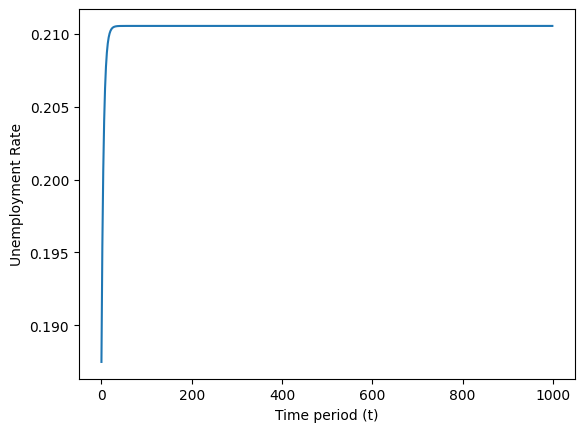

In [23]:
# your code here
# Plots unemployment rate over time for t = 1000
plot_simulation(x0,A, T = 1000)

## Question 2

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the Numpy random numbers approximate these
values? (*hint*: some functions in [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html) and [Randomness](https://datascience.quantecon.org/../scientific/randomness.html) might be useful)

Please only use the functions in the Numpy package (i.e., don't use `scipy.stats`) to answer this question.

In [4]:
# your code here

# approximates mean and variance of Uniform(1，2） using numpy.random.rand
def approximates_uniform(n_draws):
    # sets seed
    np.random.seed(20230303)
    X = np.random.rand(n_draws)
    mean = np.mean(X)
    variance = np.var(X)
    return mean, variance

# simulates the approximation increasing size of the array
steps = [10, 100, 1_000, 10_000]
for step in steps:
    mean, variance = approximates_uniform(step)
    print(f"""
    The size {step} of array of random numbers from [0 , 1) yields has the following mean and variance:
    
    Mean: {round(mean, 4)}, Variance: {round(variance,4)} in 4 decimal places"
        """)


    The size 10 of array of random numbers from [0 , 1) yields has the following mean and variance:
    
    Mean: 0.4498, Variance: 0.1135 in 4 decimal places"
        

    The size 100 of array of random numbers from [0 , 1) yields has the following mean and variance:
    
    Mean: 0.5246, Variance: 0.0773 in 4 decimal places"
        

    The size 1000 of array of random numbers from [0 , 1) yields has the following mean and variance:
    
    Mean: 0.5073, Variance: 0.0832 in 4 decimal places"
        

    The size 10000 of array of random numbers from [0 , 1) yields has the following mean and variance:
    
    Mean: 0.4973, Variance: 0.0825 in 4 decimal places"
        


By above results, we can see as number of iterations/draws for the size of the array generated from `numpy.random.rand` increases, their mean and variance approximates to $\frac{1}{2} = 0.05$ and $\frac{1}{12} \approx 0.0833$ respectively. Hence, verified that mean and variance of the Uniform(0,1) distribution are (1/2, 1/12) respectively, since the `numpy.random.rand` function creates array of user given shape (in this case `n_draws`) and populate it with random samples from the range of $[0, 1)$

我不知道要不要用markdown解释，我只是觉得只用print statement不够强力。 如果你觉得不需要也可以直接删了^这个

## Question 3

Assume you have been given the opportunity to choose between one of three financial assets.

You will be given the asset for free, allowed to hold it indefinitely, and will keep all payoffs.

Also assume the assets’ payoffs are distributed as follows (the notations are the same as in “Continuous Distributions” subsection of [Randomness](https://datascience.quantecon.org/../scientific/randomness.html)):

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?  
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)  


You can find the official documentation of `scipy.stats` [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [70]:
st.gamma(5.3, scale = 2)

In [148]:
# # your code here
def assets_distribution_returns(p1, p2, option, x=None):
    if option == "Normal":
        mu = ("mu", p1)
        sigma = ("sigma", p2)
        
        pdf = st.norm(mu[1], sigma[1])
        
    elif option == "Gamma":
        k = ("k", p1)
        theta = ("theta", p2)
        
        
        #x = np.linspace(0.1, 20, 130)
        pdf = st.gamma(k[1], scale=theta[1])
    else:
        print("Invalid option, try again") 
        
    avg = round(pdf.mean(), 3)
    median = round(pdf.median(), 3)
    cv = round(pdf.std() / avg, 3)
    out = {"Mean": avg,
           "Median" : median,
           "Coefficient_variation": cv
          }
    return out 

normal =  {"Asset" : "Normal (5, 10"} | assets_distribution_returns(10, 5, "Normal")
gamma_1 = {"Asset": "Gamma (5.3, 2)"} | assets_distribution_returns(5.3, 2, "Gamma")
gamma_2 = {"Asset": "Gamma (5, 2)"} | assets_distribution_returns(5, 2, "Gamma")

# merge results together and display
highest_mean = None
highest_median = None
lowest_cv = None
assets = [normal, gamma_1, gamma_2]
for asset in assets:
    # finds higest mean
    if highest_mean is None or asset["Mean"] > highest_mean:
        highest_mean = asset["Mean"]
        asset_hm = asset["Asset"]
        
    # finds highest median
    if highest_median is None or asset["Median"] > highest_median:
        highest_median = asset["Median"]
        asset_md = asset["Asset"]
        
    # finds lowest cv
    if lowest_cv is None or asset["Coefficient_variation"] < lowest_cv:
        lowest_cv = asset["Coefficient_variation"]
        asset_cv = asset["Asset"]
        
print(f"{asset_hm} has highest mean return of {highest_mean}")
print(f"{asset_md} has highest median return of {highest_median}")
print(f"{asset_cv} has lowest coefficient of variation of {lowest_cv}")

Gamma (5.3, 2) has highest mean return of 10.6
Normal (5, 10 has highest median return of 10.0
Gamma (5.3, 2) has lowest coefficient of variation of 0.434


Answers: 
- Which asset has the highest average returns?

    Based the on above graph, we can tell the normal distribution has **lower** average returns than any of the gammas, and in the gamma ones, we could see that the $\Gamma(5.3, 2)$ has slightly **higher** average than the $\Gamma(5,2)$, and this is easy to prove, since its expectation value is $E[X] = K \theta$. Hence,  the asset that follows the distribution of Gamma with $ k = 5.3, \theta = 2 $  has highest average returns.

- Which asset has the highest median returns?

    Based on the calculations above, the Normal(5,10) distribution has **highest** median returns 
    
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?
    
    Based on the calculations above, the Gamma(5.3, 2) has **lowest** coefficient of variation
    
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)

    I would choose asset 2, which is the one that follows $Gamma(k=5.3, \theta = 2)$, since it has the highest mean and median return, and lowest coefficient of variation (lower risk) among all assets here.

你先看看这个[pizza post](https://piazza.com/class/lcpfhxvstmygz/post/127)。 我实在是编不出来了，你再看看要不要把图删了吧，感觉一点用也没有。。 然后有一点点小混乱，我打算周三问一下老师看

## Question 4

Take the example with preferences over bananas (B) and apples (A) in [Optimization](https://datascience.quantecon.org/../scientific/optimization.html)

The consumer solves the following problem:

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Fix $ p_A = 2 $ and $ \alpha = 0.3 $.  Make a grid of `W` between `1` and `3` and then plot the optimal ratio of B to A.

In [153]:
# p_A = 3
# alpha = 0.4

# # Your code here
# n_w = 50
# W = np.linspace(1, 3, n_w)

# def A_bc(W, B, p_A):
#     return (W-B)/p_A

# def U(A, B,alpha):
#     return B**(alpha) * A**(1-alpha)

# # ratio?
# ratio = np.zeros(n_w)
# def objective_function(B, W, p_A):
#     A = A_bc(W, B, p_A)
#     return -U(A,B, alpha)
# for i, wage in enumerate(W):
#     result = opt.minimize(objective_function(B, W=wage, p_A=p_A), x0 = 1)
#     B = result.x
#     A = A_bc(wage, B, p_A)
#     ratio[i] = B/A
# fig, ax = plt.subplots()
# ax.plot(W, ratio)


Do the same graph for $ \alpha = 0.5 $ **and compare/interpret.**

In [ ]:
# Your code here

## Question 5

Suppose that you own a mobile app that has a "freemium" pricing policy, and you want to model how the behavior of your users depends on the monthly subscription price that you charge.

The population of your potential app users are distributed between three states; Non-users, Free users, and Premium users. **All users begin as Non-users**; a Non-user will never go directly from being a Non-user to being a Premium user, without first trying the app out as a Free user for at least one month. In each month, 5\% of the Non-users will decide to try the app in the next month.

In every time period, 0.5\% of the Free users tend to leave the app and become Non-users again. After those users switch, some of the remaining users will choose to subscribe to the app in a given month (and transfer from the Free user category to the Premium user category). The probability that a Free user who did not already leave the app chooses to subscribe for the next month depends on the monthly price that you charge. If the monthly price is represented by a positive number $p$, then the probability of subscribing is given by $$\mathbb{P}\left[ \text{Free user chooses to subscribe to Premium}\right] = \frac{1-\mathbb{P[\text{Free user chooses to leave the app}]}}{1+p}.$$

Finally, every month 5\% of Premium users will cancel their subscriptions, and 1\%  of Premium users will delete the app and become Non-users again.



Define a function `transition_matrix` over prices $p$, whose output is a row-stochastic version of the matrix that describes the transition probabilities in this economy.

Write another function called `iterate` that takes as arguments $p$ and $t$, where $t$ is the number of months and takes a default value of 6 months, and outputs the distribution of users into categories after $t$ months.

你看一下对不对然后删了就行？

![](https://raw.githubusercontent.com/tonyliang19/ECON323_2023_Spring/local/problem_sets/extra/econ_mc.jpg?raw=True)

In [11]:
# your code here
def transition_matrix(p):
    p_fp = 0.995 - (0.05  / (1+p))
    matrix = np.array([[0.95, 0.05, 0], 
                       [0.005, 0.995 - p_fp, p_fp], 
                       [0.01, 0.05, 0.94]])
    return matrix
                      

In [13]:
transition_matrix(1)

array([[0.95 , 0.05 , 0.   ],
       [0.005, 0.025, 0.97 ],
       [0.01 , 0.05 , 0.94 ]])

Create a figure with three subplots arranged horizontally. On each subplot, show the evolution of your distribution of users over the first year of your new app. Each figure should have time $t$ as the x-axis, and the y-axis should track the proportions of users in each category, for a specific price. On these axes, show how the number of users in each category changes over time with a monthly price equal to $p=0.10$, $p=2$, and $p=20$, respectively. Make sure to clearly label your lines, axes, and subplots.

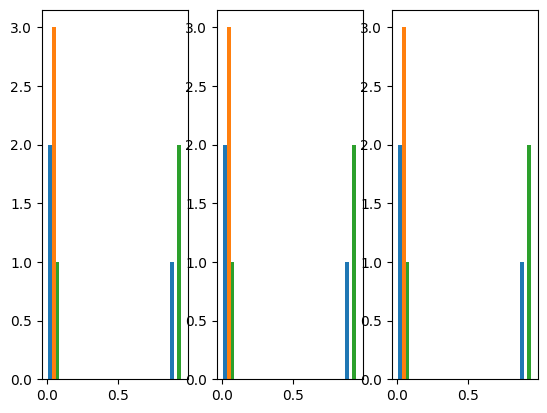

In [81]:
# your code here
time = np.linspace(1, 12, 12)
fig, ax = plt.subplots(1, 3)
prices = [0.10, 2, 20]
for i, price in enumerate(prices):
    ax[i].hist(transition_matrix(p=price))

很明显这是不太对的^^^^^, 回头改 9：40了还没吃饭, 你可以先看看其他的大概？？

Which of the above prices yields the most premium users after one year? Is this surprising? Why or why not?